<a href="https://colab.research.google.com/github/farkhanAdhitama/Final_Task_IDX_Partners_Data_Scientist/blob/main/Final_Task_ID_X_Partners_Data_Scientist_Muhammad_Farkhan_Adhitama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Task ID/X Partners Data Scientist : Muhammad Farkhan Adhitama

**Prediksi credit risk** merupakan metode yang efektif untuk mengevaluasi apakah seorang calon peminjam akan mampu melunasi pinjamannya.

**Penjelasan solusi:**  
Sebagai seorang data scientist, kita akan membangun sebuah model machine learning yang dapat mengidentifikasi apakah suatu pinjaman tergolong berisiko atau berpotensi gagal bayar. Model ini nantinya dapat digunakan sebagai alat bantu dalam pengambilan keputusan investasi. Jika model yang kami kembangkan cukup andal, maka investasi pada pinjaman yang berisiko akan berkurang, potensi kerugian dapat diminimalkan, dan margin keuntungan bersih akan meningkat.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Load Dataset

Data yang digunakan adalah data loan dataset dari tahun 2007 sampai 2014. Dataset tersebut dapat diakses pada link berikut :   
```
https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv
```
Dataset tersebut berisi data historis calon kreditur yang dapat digunakan untuk memprediksi apakah seseorang layak diberi kredit. Untuk memahami isi dataset tersebut, kita dapat melihat penjelasannya di link berikut:
```
https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit?usp=sharing&ouid=106453318899954059421&rtpof=true&sd=true
```

In [2]:
# Load dataset (load dataset) dari link yang disediakan
# URL CSV export dari Google Sheets
url = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"
# Load ke DataFrame
df = pd.read_csv(url)
df.head()


<ipython-input-2-d71d5df50113>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

### Struktur Dataset

In [3]:
# Tampilkan struktur lengkap dataset loan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Statistik Dataset

In [4]:
# Tampilkan statistik dataset untuk kolom numerikal
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


### Mendefinisikan Fitur  Target

Sebelum melakukan Exploratory Data Analysis (EDA), kita akan memilih fitur target yang digunakan untuk memprediksi apakah peminjam layak diberi kredit pinjaman. Prediksi risiko kredit merupakan cara efektif untuk mengevaluasi apakah calon peminjam akan membayar kembali pinjamannya. Fitur target yang digunakan adalah loan_status (status kredit). Isi dari fitur tersebut yaitu:  
- Current
- Fully Paid
- Charged Off
- Late (31-120 days)
- In Grace Period
- Does not meet the credit policy. Status:Fully Paid
- Late (16-30 days)
- Default
- Does not meet the credit policy. Status:Charged Off  

Status tersebut akan dikelompokkan menjadi dua kelompok yaitu :   
- Good = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
- Bad = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']


In [5]:
# Cek isi kolom loan_status
df["loan_status"].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [6]:
# Tambahkan kolom credit_risk berdasarkan kelompok yang dibuat
good_status = [
    'Current',
    'Fully Paid',
    'In Grace Period',
    'Does not meet the credit policy. Status:Fully Paid'
]

bad_status = [
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

df['credit_risk'] = df['loan_status'].apply(
    lambda x: 'Good' if x in good_status else ('Bad' if x in bad_status else 'Unknown')
)

In [7]:
# Sample loan status dan credit risk
df[["loan_status", "credit_risk"]].head()

,loan_status,credit_risk
0,Fully Paid,Good
1,Charged Off,Bad
2,Fully Paid,Good
3,Fully Paid,Good
4,Current,Good


## EDA

### Status Kredit Peminjam

In [8]:
# Perbandingan jumlah credit risk pada peminjam
df['credit_risk'].value_counts()

,count
credit_risk,
Good,414099
Bad,52186


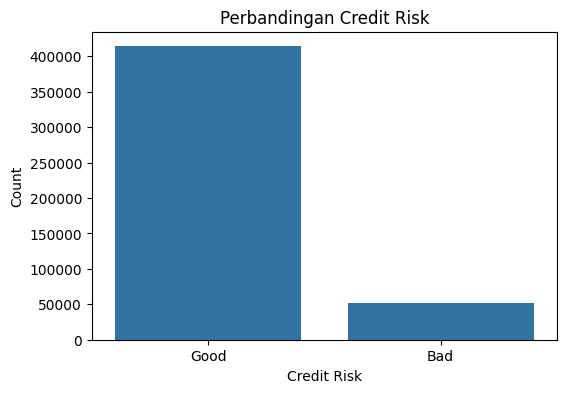

In [9]:
# Visualisasi perbandingan credit_risk antara good atau bad
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="credit_risk")
plt.title("Perbandingan Credit Risk")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()

Dilihat dari visualisasi di atas, mayoritas peminjam memiliki status kredit yang baik. Hanya sedikit peminjam yang memiliki status kredit yang buruk.

### Kelompokkan Fitur

In [10]:
# Loan Characteristics
loan_cols = np.intersect1d(df.columns, [
'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
'grade', 'sub_grade', 'purpose', 'loan_status', 'application_type'
])

# Borrower Profile & Capacity
borrower_cols = np.intersect1d(df.columns, [
'addr_state', 'home_ownership', 'emp_length', 'emp_title',
'annual_inc', 'dti', 'is_inc_v', 'zip_code'
])

# Credit Score & History
credit_history_cols = np.intersect1d(df.columns, [
'fico_range_low', 'fico_range_high', 'earliest_cr_line',
'open_acc', 'total_acc', 'pub_rec', 'mths_since_last_record'
])

# Credit Utilization & Behavior
credit_behavior_cols = np.intersect1d(df.columns, [
'revol_bal', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq',
'acc_now_delinq', 'inq_last_6mths', 'collections_12_mths_ex_med'
])

# Loan Performance & Recovery
performance_cols = np.intersect1d(df.columns, [
'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'
])

# Target feature
target_col = ['credit_risk']

In [11]:
# Membuat dataframe untuk masing masing kelompok fitur
df_loan = df[loan_cols]
df_borrower = df[borrower_cols]
df_credit_history = df[credit_history_cols]
df_credit_behavior = df[credit_behavior_cols]
df_performance = df[performance_cols]

#### Loan Characteristics

In [12]:
# Gabungkan df_load dengan fitur target
df_loan = pd.concat([df_loan, df[target_col]], axis=1)
df_loan.head()

,application_type,funded_amnt,grade,installment,int_rate,loan_amnt,loan_status,purpose,sub_grade,term,credit_risk
0,INDIVIDUAL,5000,B,162.87,10.65,5000,Fully Paid,credit_card,B2,36 months,Good
1,INDIVIDUAL,2500,C,59.83,15.27,2500,Charged Off,car,C4,60 months,Bad
2,INDIVIDUAL,2400,C,84.33,15.96,2400,Fully Paid,small_business,C5,36 months,Good
3,INDIVIDUAL,10000,C,339.31,13.49,10000,Fully Paid,other,C1,36 months,Good
4,INDIVIDUAL,3000,B,67.79,12.69,3000,Current,other,B5,60 months,Good


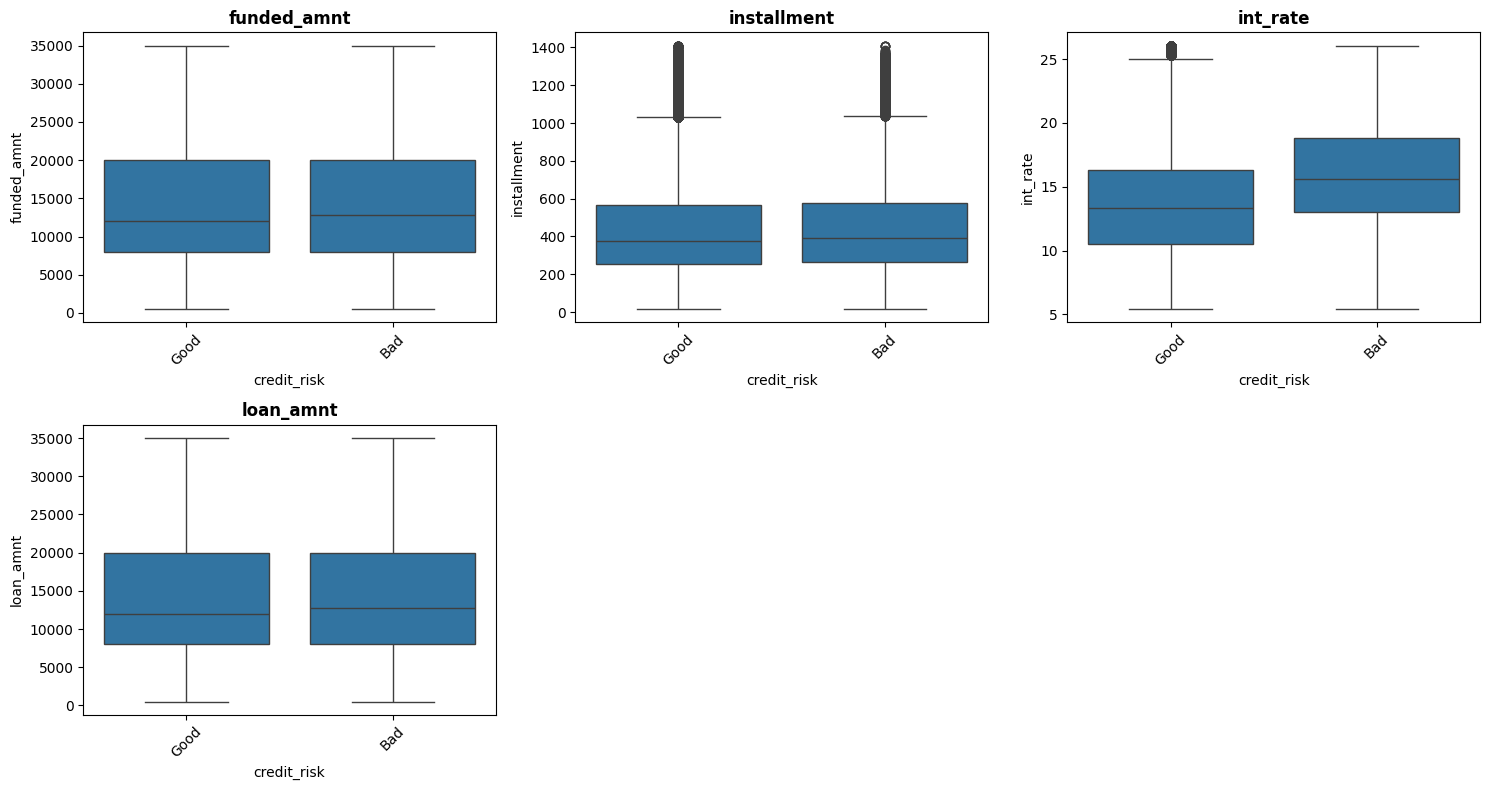

In [13]:
# Fitur numerik
num_cols = df_loan.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Create subplots with 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()
# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_loan, x='credit_risk', y=col, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
# Hide empty subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

Dari visualisasi di atas, didapatkan insight bahwa int_rate pada credit risk yang buruk cenderung lebih tinggi dari pada yang baik.

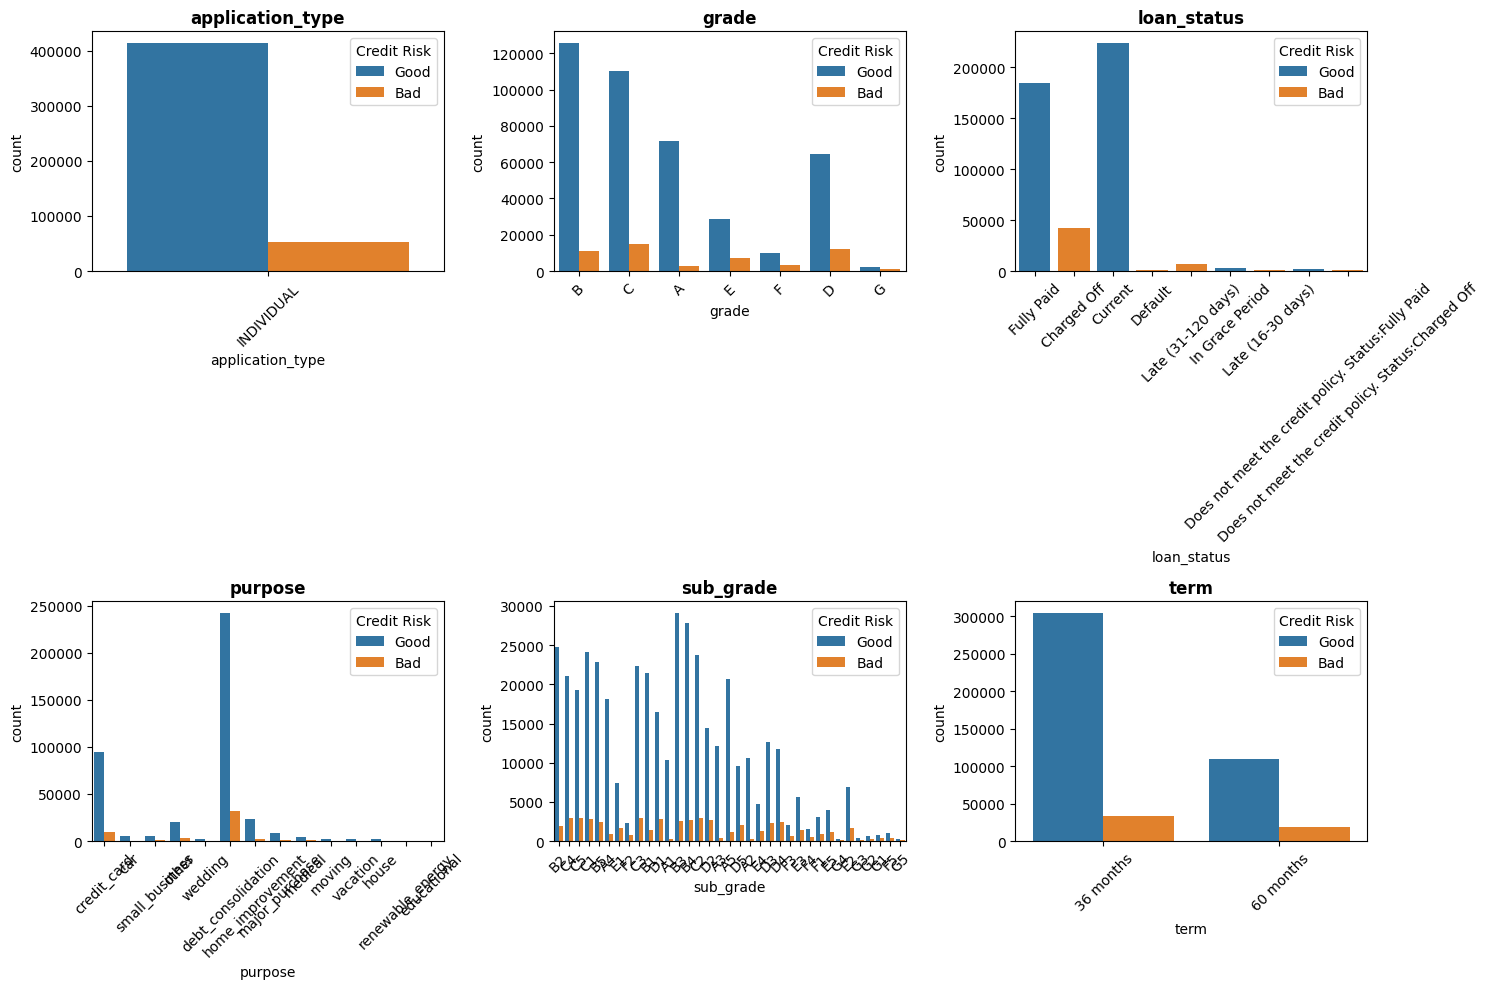

In [14]:
# Fitur Kategorikal
cat_cols = df_loan.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'credit_risk']

# Calculate number of rows needed for 3 columns layout
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))
# Create subplots with 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
# Flatten axes array for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()
# Create countplots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df_loan, x=col, hue='credit_risk', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Credit Risk', loc='upper right')
# Hide empty subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

Dari visualisasi tersebut, banyak insight yang didapatkan untuk memiliki fitur yang digunakan untuk prediksi credit risk dari peminjam

#### Borrower Profile & Capacity

In [15]:
# Gabungkan df_borrower dengan fitur target
df_borrower = pd.concat([df_borrower, df[target_col]], axis=1)
df_borrower.head()

,addr_state,annual_inc,dti,emp_length,emp_title,home_ownership,zip_code,credit_risk
0,AZ,24000.0,27.65,10+ years,NaN,RENT,860xx,Good
1,GA,30000.0,1.00,< 1 year,Ryder,RENT,309xx,Bad
2,IL,12252.0,8.72,10+ years,NaN,RENT,606xx,Good
3,CA,49200.0,20.00,10+ years,AIR RESOURCES BOARD,RENT,917xx,Good
4,OR,80000.0,17.94,1 year,University Medical Group,RENT,972xx,Good


In [16]:
# Tampilkan rata-rata annual_inc dan dti berdasarkan credit risk
df_borrower.groupby('credit_risk')[['annual_inc', 'dti']].mean()

,annual_inc,dti
credit_risk,,
Bad,65615.836951,18.304479
Good,74242.921654,17.081932


Annual income untuk peminjam dengan credit risk yang baik memiliki rata-rata yang lebih tinggi daripada yang buruk. Lalu tuntuk DTI hampir mirip

In [17]:
# Tampilkan jumlah home_ownership yang rent, kelompokan berdasarknan credit_risk
df_borrower.groupby('credit_risk')['home_ownership'].value_counts()

credit_risk  home_ownership
Bad          RENT               24250
             MORTGAGE           23247
             OWN                 4643
             OTHER                 38
             NONE                   8
Good         MORTGAGE          212628
             RENT              164223
             OWN                37061
             OTHER                144
             NONE                  42
             ANY                    1
Name: count, dtype: int64

Dari tabel di atas, didapatkan hasil bahwa seseorang yang memiliki credit risk yang buruk cendreung melakukan kontrak dan mortgage dengan jumlah yang mirip. Pada credit risk yang baik hampir mirip namun mortgaes jauh lebih banyak daripada rent.

#### Credit History

In [18]:
# Gabungkan df_credit_history dengan fitur target
df_credit_history = pd.concat([df_credit_history, df[target_col]], axis=1)
df_credit_history.head()

,earliest_cr_line,mths_since_last_record,open_acc,pub_rec,total_acc,credit_risk
0,Jan-85,NaN,3.0,0.0,9.0,Good
1,Apr-99,NaN,3.0,0.0,4.0,Bad
2,Nov-01,NaN,2.0,0.0,10.0,Good
3,Feb-96,NaN,10.0,0.0,37.0,Good
4,Jan-96,NaN,15.0,0.0,38.0,Good


In [19]:
# Tampilkan rata-rata open acc, pub rec, dan total acc berdasarkan credit risk
df_credit_history.groupby('credit_risk')[['open_acc', 'pub_rec', 'total_acc']].mean()

,open_acc,pub_rec,total_acc
credit_risk,,,
Bad,11.113025,0.148650,24.333576
Good,11.196400,0.162066,25.156535


#### Credit Behavior

In [20]:
# Gabungkan df_credit_behavior dengan fitur target
df_credit_behavior = pd.concat([df_credit_behavior, df[target_col]], axis=1)
df_credit_behavior.head()

,acc_now_delinq,collections_12_mths_ex_med,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,revol_bal,revol_util,credit_risk
0,0.0,0.0,0.0,1.0,NaN,13648,83.7,Good
1,0.0,0.0,0.0,5.0,NaN,1687,9.4,Bad
2,0.0,0.0,0.0,2.0,NaN,2956,98.5,Good
3,0.0,0.0,0.0,1.0,35.0,5598,21.0,Good
4,0.0,0.0,0.0,0.0,38.0,27783,53.9,Good


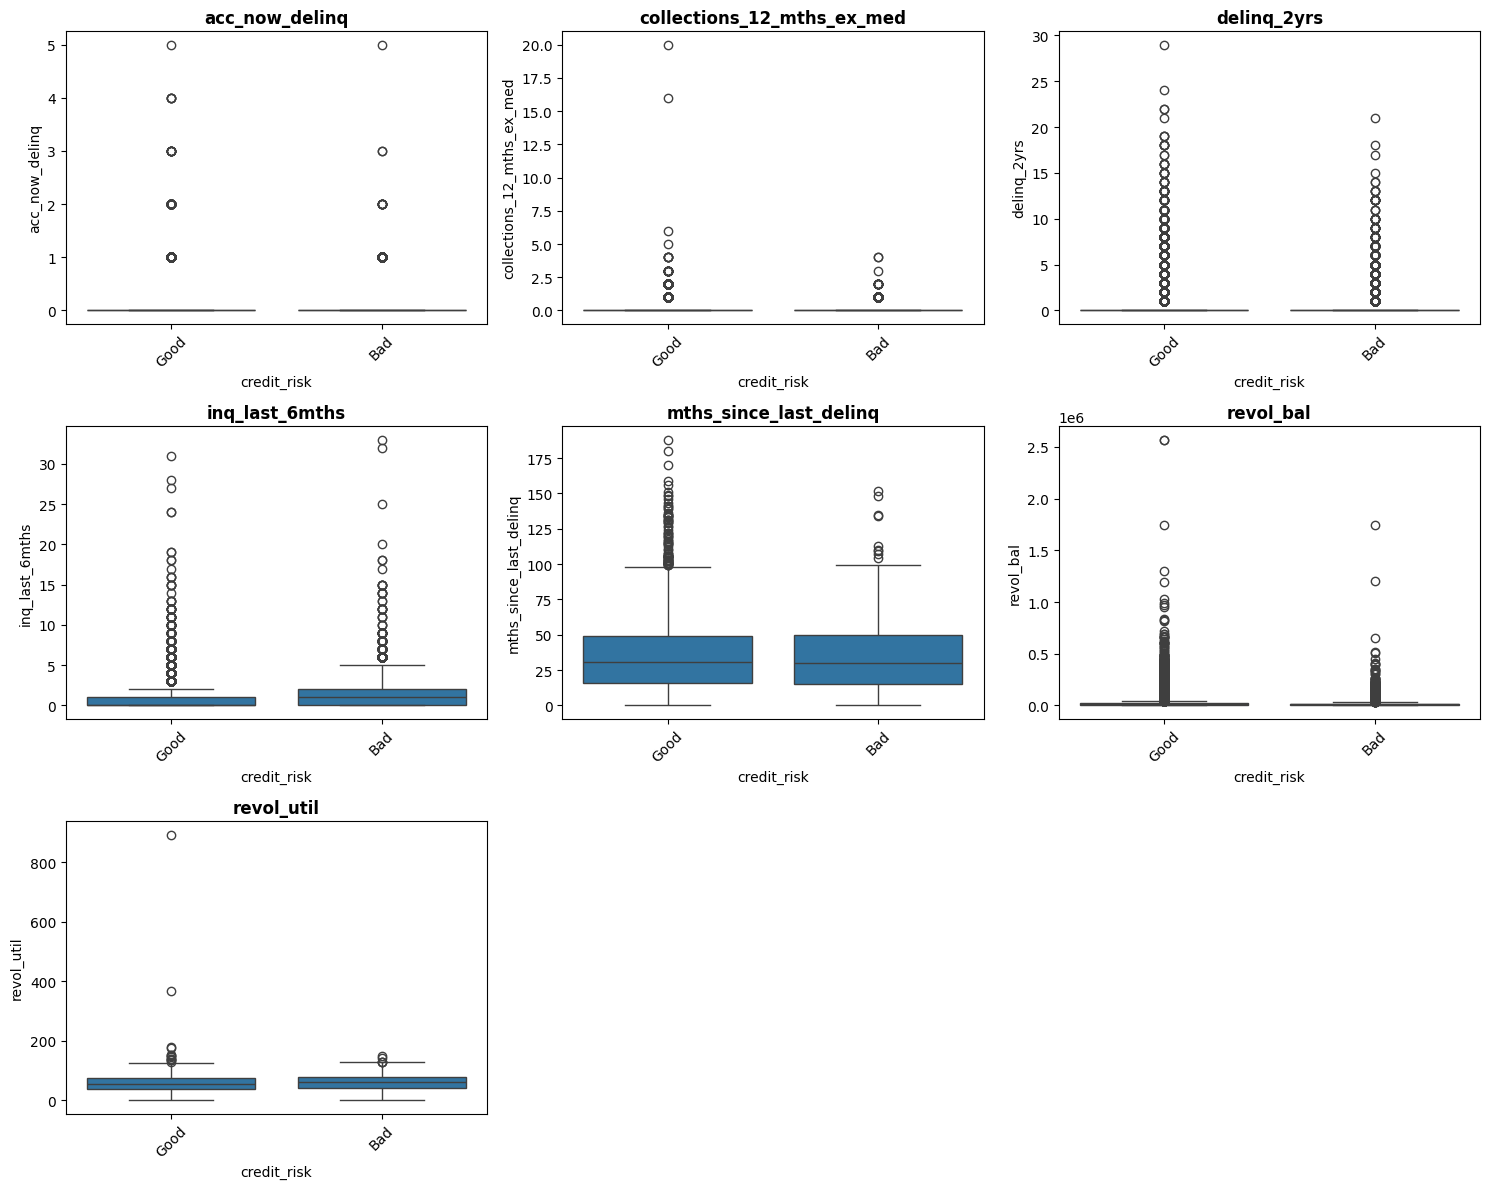

In [21]:
# Fitur numerik
num_cols = df_credit_behavior.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Create subplots with 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()
# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_credit_behavior, x='credit_risk', y=col, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
# Hide empty subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

#### Borrower Performance

In [22]:
# Gabungkan df_performance dengan fitur target
df_performance = pd.concat([df_performance, df[target_col]], axis=1)
df_performance.head()

,collection_recovery_fee,last_pymnt_amnt,out_prncp,out_prncp_inv,recoveries,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,credit_risk
0,0.00,171.62,0.0,0.0,0.00,5861.071414,5831.78,861.07,0.00,5000.00,Good
1,1.11,119.66,0.0,0.0,117.08,1008.710000,1008.71,435.17,0.00,456.46,Bad
2,0.00,649.91,0.0,0.0,0.00,3003.653644,3003.65,603.65,0.00,2400.00,Good
3,0.00,357.48,0.0,0.0,0.00,12226.302210,12226.30,2209.33,16.97,10000.00,Good
4,0.00,67.79,766.9,766.9,0.00,3242.170000,3242.17,1009.07,0.00,2233.10,Good


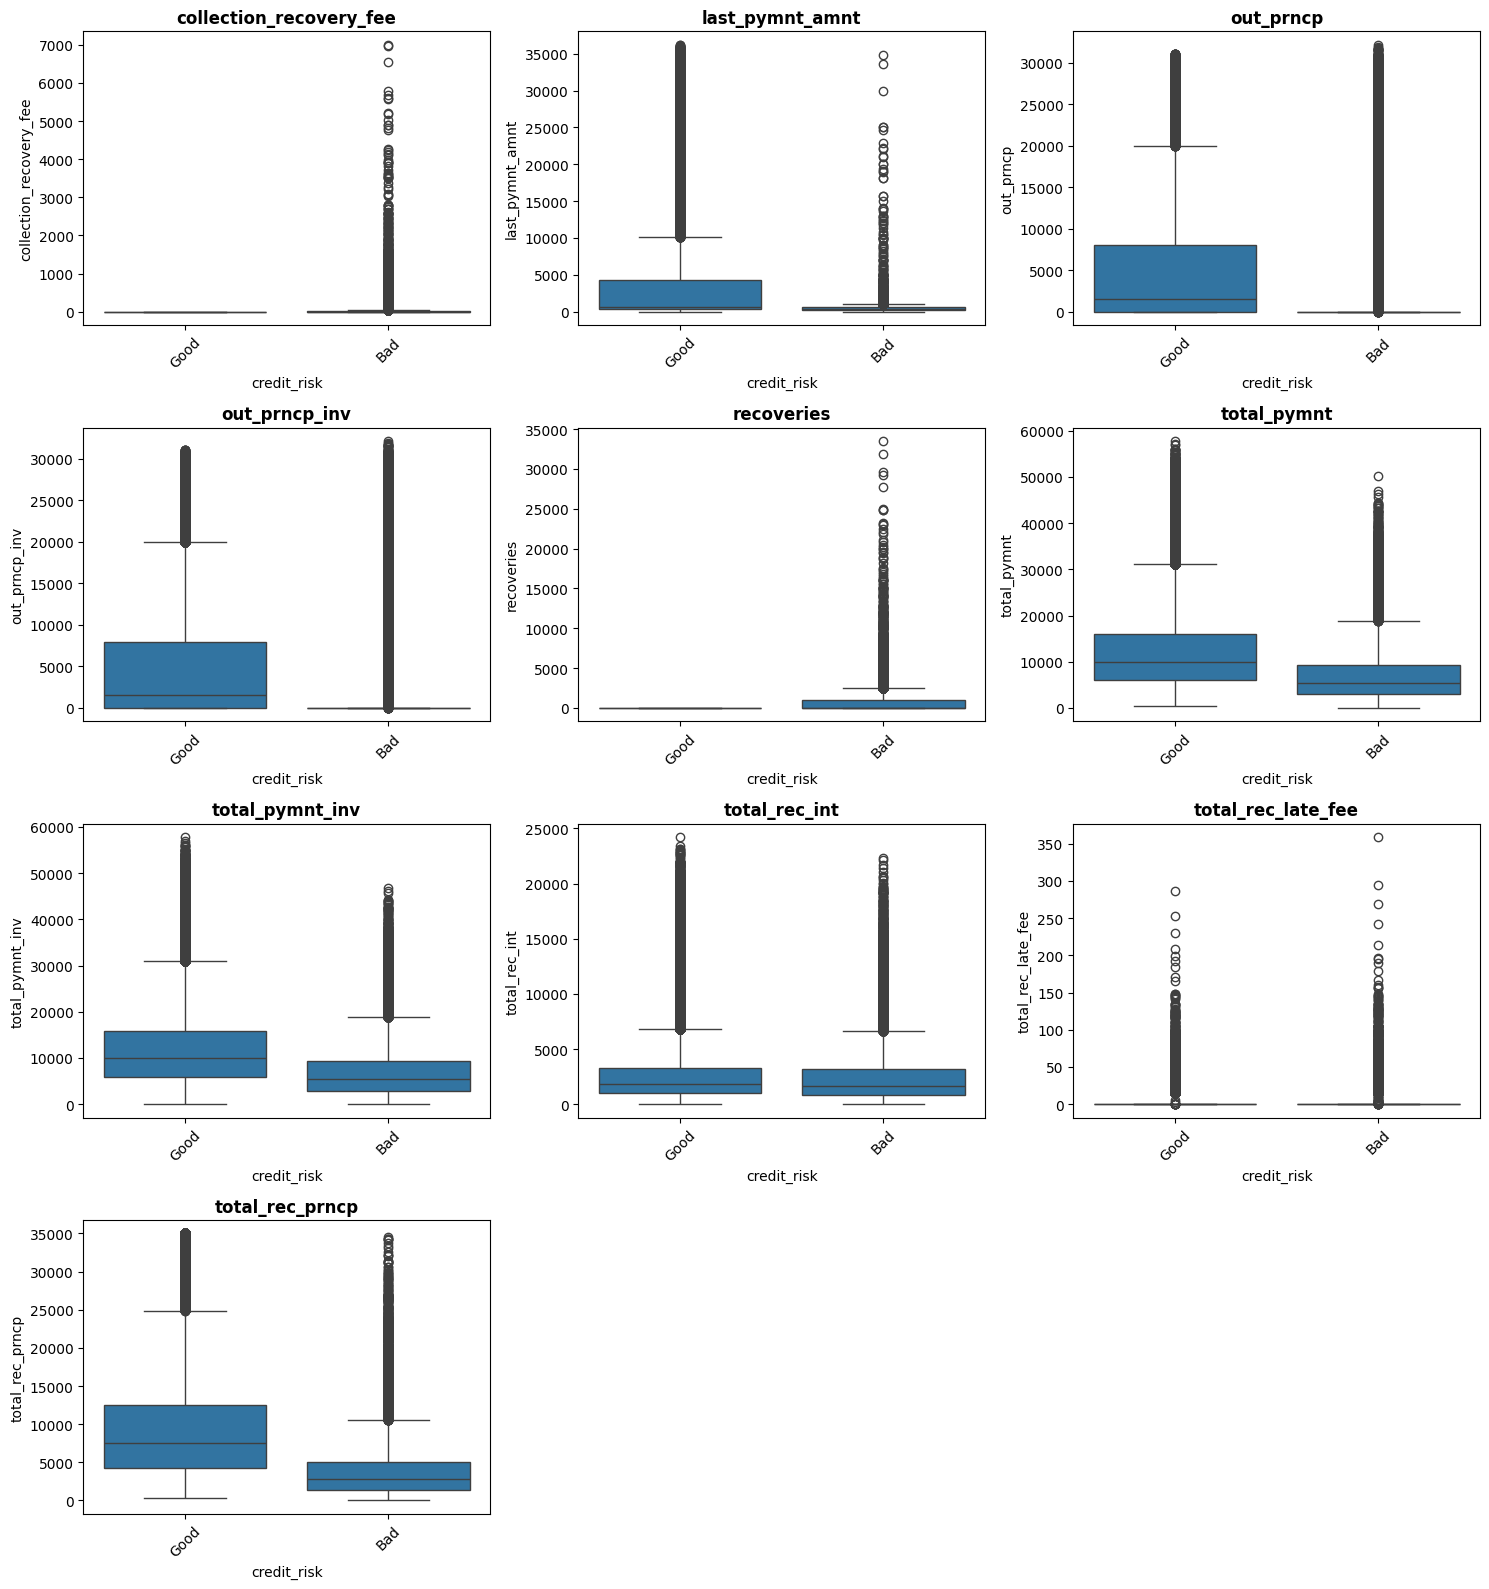

In [23]:
# Fitur numerik
num_cols = df_performance.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Create subplots with 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()
# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_performance, x='credit_risk', y=col, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
# Hide empty subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

## Data Preparation

### Drop Kolom yang Tidak Relevan

Kolom yang tidak relevan seperti Unnamed,0, id, url, dan lainnya. Kolom akan didrop karena tidak berpengaruh pada hasil prediksi.

In [24]:
df_credit = df.copy()
df_credit.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,credit_risk
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good


In [25]:
df_credit.drop(columns=['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code' ,'emp_title'], inplace=True)
df_credit.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,credit_risk
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good


### Cek Missing Value

In [26]:
df_credit.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
...,...
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285
inq_last_12m,466285


In [27]:
# Menghitung rasio missing value setiap kolom
# Hitung rasio missing value
missing_ratio = df_credit.isnull().mean()
missing_over_10 = missing_ratio[missing_ratio > 0.10]
missing_over_10_percent = (missing_over_10 * 100).round(2).astype(str) + '%'
print(missing_over_10_percent)

mths_since_last_delinq         53.69%
mths_since_last_record         86.57%
next_pymnt_d                   48.73%
mths_since_last_major_derog    78.77%
annual_inc_joint               100.0%
dti_joint                      100.0%
verification_status_joint      100.0%
tot_coll_amt                   15.07%
tot_cur_bal                    15.07%
open_acc_6m                    100.0%
open_il_6m                     100.0%
open_il_12m                    100.0%
open_il_24m                    100.0%
mths_since_rcnt_il             100.0%
total_bal_il                   100.0%
il_util                        100.0%
open_rv_12m                    100.0%
open_rv_24m                    100.0%
max_bal_bc                     100.0%
all_util                       100.0%
total_rev_hi_lim               15.07%
inq_fi                         100.0%
total_cu_tl                    100.0%
inq_last_12m                   100.0%
dtype: object


In [28]:
# Drop kolom yang memiliki mising value lebih dari 10 persen jumlah baris data
df_credit = df_credit.drop(columns=missing_over_10.index)

In [29]:
df_credit.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,21008
home_ownership,0


In [30]:
# Lihat isi dari masing masing kolom yang masih memiliki missinf values
missing_cols = df_credit.columns[df_credit.isna().any()]
df_credit[missing_cols].head()

,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq
0,10+ years,24000.0,0.0,Jan-85,1.0,3.0,0.0,83.7,9.0,Jan-15,Jan-16,0.0,0.0
1,< 1 year,30000.0,0.0,Apr-99,5.0,3.0,0.0,9.4,4.0,Apr-13,Sep-13,0.0,0.0
2,10+ years,12252.0,0.0,Nov-01,2.0,2.0,0.0,98.5,10.0,Jun-14,Jan-16,0.0,0.0
3,10+ years,49200.0,0.0,Feb-96,1.0,10.0,0.0,21.0,37.0,Jan-15,Jan-15,0.0,0.0
4,1 year,80000.0,0.0,Jan-96,0.0,15.0,0.0,53.9,38.0,Jan-16,Jan-16,0.0,0.0


In [31]:
# Hapus emp_length karena terlalu banyak data yang hilang
df_credit.drop(columns=['emp_length'], inplace=True)

In [32]:
# Isi earliest_cr_line, last_pymnt_d, last_credit_pull_d yang null dengan "unknown"
df_credit['earliest_cr_line'] = df_credit['earliest_cr_line'].fillna('unknown')
df_credit['last_pymnt_d'] = df_credit['last_pymnt_d'].fillna('unknown')
df_credit['last_credit_pull_d'] = df_credit['last_credit_pull_d'].fillna('unknown')
missing_cols = df_credit.columns[df_credit.isna().any()]
print(missing_cols)

Index(['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq'],
      dtype='object')


In [33]:
# Mengisi missing value pada kolom numerik menggunakan median dari data tersebut
cols_to_impute = [
    'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'total_acc',
    'collections_12_mths_ex_med', 'acc_now_delinq'
]
for col in cols_to_impute:
    if col in df_credit.columns:
        if df_credit[col].dtype in ['float64', 'int64']:
            median_val = int(df_credit[col].median())
            df_credit[col] = df_credit[col].fillna(median_val).astype(int)

In [34]:
# Cek kembali kolom yang memiliki missing values
df_credit.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0


Dari tabel di atas, dataset yang kita gunakan sudah bersih dari missing values dengan menerapkan beberapa cara yaitu menghapus kolom dan mengisi kolom dengan string dan median.

### Cek Data Duplikat

In [35]:
# Cek data duplikat
df_credit.duplicated().sum()

np.int64(0)

Tidak ada data duplikat yang ditemukan, maka lanjutkan ke tahap berikutnya.

### Deteksi Outlier (IQR)

In [36]:
# Ambil semua kolom numerik
df_iqr = df_credit.copy()
numeric_cols = df_iqr.select_dtypes(include=['int64', 'float64']).columns
# Simpan outlier dalam dictionary
print("Jumlah outlier sebelum penanganan:")
for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound)
    num_outliers = outlier_mask.sum()

    print(f"Kolom '{col}': {num_outliers} outlier")

Jumlah outlier sebelum penanganan:
Kolom 'loan_amnt': 0 outlier
Kolom 'funded_amnt': 0 outlier
Kolom 'funded_amnt_inv': 0 outlier
Kolom 'int_rate': 4904 outlier
Kolom 'installment': 11711 outlier
Kolom 'annual_inc': 19899 outlier
Kolom 'dti': 43 outlier
Kolom 'delinq_2yrs': 83302 outlier
Kolom 'inq_last_6mths': 36785 outlier
Kolom 'open_acc': 10440 outlier
Kolom 'pub_rec': 61363 outlier
Kolom 'revol_bal': 22879 outlier
Kolom 'revol_util': 22 outlier
Kolom 'total_acc': 8674 outlier
Kolom 'out_prncp': 23331 outlier
Kolom 'out_prncp_inv': 23381 outlier
Kolom 'total_pymnt': 19039 outlier
Kolom 'total_pymnt_inv': 19052 outlier
Kolom 'total_rec_prncp': 20649 outlier
Kolom 'total_rec_int': 31138 outlier
Kolom 'total_rec_late_fee': 10678 outlier
Kolom 'recoveries': 24371 outlier
Kolom 'collection_recovery_fee': 23206 outlier
Kolom 'last_pymnt_amnt': 70346 outlier
Kolom 'collections_12_mths_ex_med': 3914 outlier
Kolom 'policy_code': 0 outlier
Kolom 'acc_now_delinq': 1732 outlier


In [37]:
# Atasi outliers dengan mengganti outlier dengan nilai median kolom
for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound)
    num_outliers = outlier_mask.sum()

    if num_outliers > 0:
        median_val = df_iqr[col].median()
        df_iqr.loc[outlier_mask, col] = median_val
        print(f"Kolom '{col}': {num_outliers} outlier telah diganti dengan median ({median_val})")
    else:
        print(f"Kolom '{col}': tidak memiliki outlier.")

Kolom 'loan_amnt': tidak memiliki outlier.
Kolom 'funded_amnt': tidak memiliki outlier.
Kolom 'funded_amnt_inv': tidak memiliki outlier.
Kolom 'int_rate': 4904 outlier telah diganti dengan median (13.66)
Kolom 'installment': 11711 outlier telah diganti dengan median (379.89)
Kolom 'annual_inc': 19899 outlier telah diganti dengan median (63000.0)
Kolom 'dti': 43 outlier telah diganti dengan median (16.87)
Kolom 'delinq_2yrs': 83302 outlier telah diganti dengan median (0.0)
Kolom 'inq_last_6mths': 36785 outlier telah diganti dengan median (0.0)
Kolom 'open_acc': 10440 outlier telah diganti dengan median (10.0)
Kolom 'pub_rec': 61363 outlier telah diganti dengan median (0.0)
Kolom 'revol_bal': 22879 outlier telah diganti dengan median (11764.0)
Kolom 'revol_util': 22 outlier telah diganti dengan median (57.0)
Kolom 'total_acc': 8674 outlier telah diganti dengan median (23.0)
Kolom 'out_prncp': 23331 outlier telah diganti dengan median (441.47)
Kolom 'out_prncp_inv': 23381 outlier telah di

### Encoding Data Kategorikal

In [38]:
df_encoded = df_iqr.copy()
df_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,credit_risk
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000,...,0.0,0.0,Jan-15,171.62,Jan-16,0,1,INDIVIDUAL,0,Good
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000,...,0.0,0.0,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252,...,0.0,0.0,Jun-14,649.91,Jan-16,0,1,INDIVIDUAL,0,Good
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200,...,0.0,0.0,Jan-15,357.48,Jan-15,0,1,INDIVIDUAL,0,Good
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000,...,0.0,0.0,Jan-16,67.79,Jan-16,0,1,INDIVIDUAL,0,Good


In [39]:
from sklearn.preprocessing import LabelEncoder
# Simpan kolom credit_risk
credit_risk_col = df_encoded['credit_risk']
# Pilih kolom kategorikal
categorical_cols = df_encoded.select_dtypes(include=['object'])
# Simpan label encoder untuk tiap kolom jika dibutuhkan nanti
label_encoders = {}
# Encode setiap kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [40]:
df_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,credit_risk
0,5000,5000,4975.0,0,10.65,162.87,1,6,5,24000,...,0.0,0.0,40,171.62,41,0,1,0,0,1
1,2500,2500,2500.0,1,15.27,59.83,2,13,5,30000,...,0.0,0.0,5,119.66,100,0,1,0,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,14,5,12252,...,0.0,0.0,56,649.91,41,0,1,0,0,1
3,10000,10000,10000.0,0,13.49,339.31,2,10,5,49200,...,0.0,0.0,40,357.48,40,0,1,0,0,1
4,3000,3000,3000.0,1,12.69,67.79,1,9,5,80000,...,0.0,0.0,41,67.79,41,0,1,0,0,1


### Data Standarization

In [41]:
# Standarization data dengan scaler
from sklearn.preprocessing import StandardScaler
df_scaled = df_encoded.copy()
# Scaling kolom numerik
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled)  # hasilnya numpy array
df_scaled = pd.DataFrame(scaled_array, columns=df_scaled.columns, index=df_scaled.index)

In [42]:
df_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,credit_risk
0,-1.124392,-1.122963,-1.114455,-0.616225,-0.729386,-1.171523,-0.618831,-0.775660,1.096523,-1.476454,...,0.0,0.0,-0.225814,-0.556844,-0.216845,0.0,0.0,0.0,0.0,0.354997
1,-1.426088,-1.425101,-1.412732,1.622784,0.373724,-1.655352,0.138524,0.296334,1.096523,-1.266969,...,0.0,0.0,-1.784768,-0.591131,3.084344,0.0,0.0,0.0,0.0,-2.816924
2,-1.438156,-1.437186,-1.424784,-0.616225,0.538474,-1.540311,0.138524,0.449476,1.096523,-1.886627,...,0.0,0.0,0.486851,-0.241235,-0.216845,0.0,0.0,0.0,0.0,0.354997
3,-0.521001,-0.518687,-0.508860,-0.616225,-0.051284,-0.343042,0.138524,-0.163092,1.096523,-0.596615,...,0.0,0.0,-0.225814,-0.434201,-0.272798,0.0,0.0,0.0,0.0,0.354997
4,-1.365749,-1.364673,-1.352474,1.622784,-0.242298,-1.617975,-0.618831,-0.316234,1.096523,0.478745,...,0.0,0.0,-0.181272,-0.625359,-0.216845,0.0,0.0,0.0,0.0,0.354997


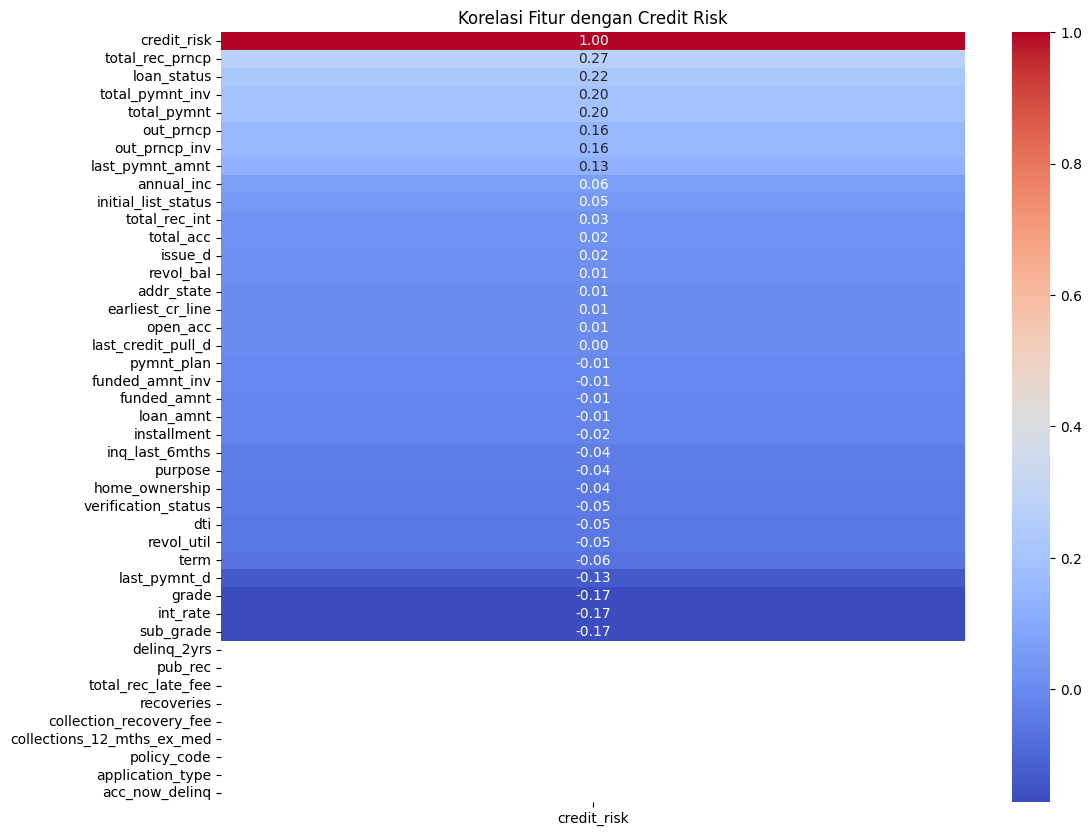

In [43]:
# Matriks korelasi antar fitur
corr_matrix = df_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['credit_risk']].sort_values(by='credit_risk', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur dengan Credit Risk')
plt.show()

### Feature Selection

Berdasarkan matriks korelasi sebelumnya, kita akan memilih beberapa fitur yang memiliki korelasi positif maupun negatif yang cukup besar dengan fitur target yaitu credit risk. Fitur tersebut yaitu 'total_rec_prncp',
    'loan_status',
    'total_pymnt_inv',
    'total_pymnt',
    'out_prncp',
    'out_prncp_inv',
    'last_pymnt_amnt',
    'last_pymnt_d',
    'grade',
    'int_rate', dan
    'sub_grade'.

In [44]:
# Daftar fitur terpilih berdasarkan korelasi dengan credit_risk
selected_features = [
    'total_rec_prncp',
    'loan_status',
    'total_pymnt_inv',
    'total_pymnt',
    'out_prncp',
    'out_prncp_inv',
    'last_pymnt_amnt',
    'last_pymnt_d',
    'grade',
    'int_rate',
    'sub_grade',
]
# Buat dataframe baru hanya dengan fitur terpilih
df_selection = df_scaled[selected_features]
df_selection.head()

,total_rec_prncp,loan_status,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv,last_pymnt_amnt,last_pymnt_d,grade,int_rate,sub_grade
0,-0.531438,1.077960,-0.708624,-0.713776,-0.690634,-0.690558,-0.556844,-0.225814,-0.618831,-0.729386,-0.775660
1,-1.376847,-1.229824,-1.461572,-1.470009,-0.690634,-0.690558,-0.591131,-1.784768,0.138524,0.373724,0.296334
2,-1.015216,1.077960,-1.150134,-1.159100,-0.690634,-0.690558,-0.241235,0.486851,0.138524,0.538474,0.449476
3,0.398903,1.077960,0.289648,0.278235,-0.690634,-0.690558,-0.434201,-0.225814,0.138524,-0.051284,-0.163092
4,-1.046270,-0.768267,-1.112898,-1.121928,-0.530158,-0.529941,-0.625359,-0.181272,-0.618831,-0.242298,-0.316234


### Split Dataset

In [45]:
# X adalah fitur, Y adalah target
X = df_selection
# Ambil target fitur dari kolom credit risk yang sudah diencoding
y = df_encoded['credit_risk']

# Split data: 95% train, 5% test  karena data yang sangat banyak (tekankan pada training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42, stratify=y
)

# Cek bentuk hasil split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (442970, 11)
X_test shape: (23315, 11)
y_train shape: (442970,)
y_test shape: (23315,)


### Resampling Dataset

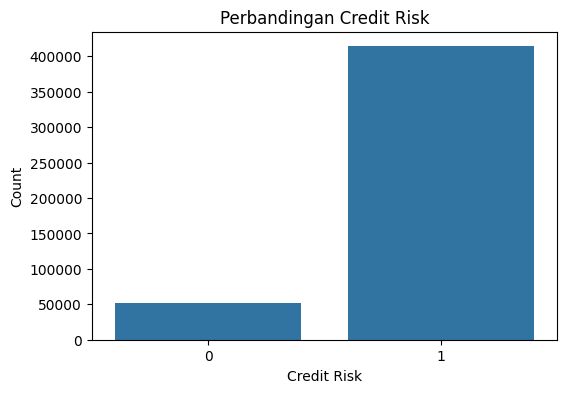

In [46]:
# Perbandingan jumlah credit risk good dan bad
plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x="credit_risk")
plt.title("Perbandingan Credit Risk")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()

Dari gambar di atas, data yang dimiliki sangat tidak seimbang sehingga berpotensi menyebabkan bias dan menurunkan performa model. Oleh karena itu, resampling sangat dibutuhkan agar data seimbang. Kita akan melakukan undersampling terlebih dahulu pada kelas good atau 1 menjadi sekitar 250 ribu data. Lalu melakukan smote pada kelas bad atau 0 hingga menjadi 200 ribu data.

In [47]:
# Undersampling kelas Good
target_counts = {
    1: 250000,  # Good → label 1
}

# Lakukan undersampling
rus = RandomUnderSampler(sampling_strategy=target_counts, random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

print("Distribusi setelah undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

Distribusi setelah undersampling: {np.int64(0): np.int64(49577), np.int64(1): np.int64(250000)}


Text(0.5, 1.0, 'Perbandingan Credit Risk Setelah Undersampling')

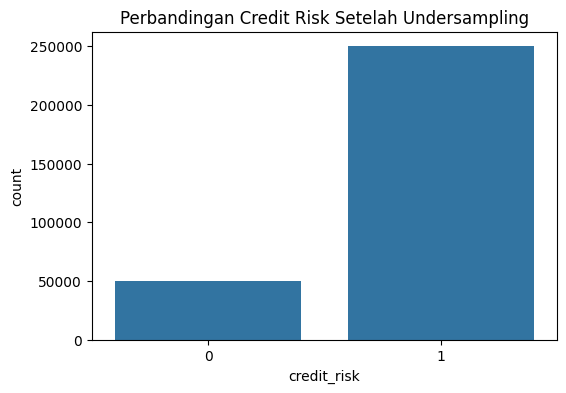

In [48]:
# Visualisasi perbandingan y_under
plt.figure(figsize=(6, 4))
sns.countplot(data=pd.DataFrame({'credit_risk': y_under}), x="credit_risk")
plt.title("Perbandingan Credit Risk Setelah Undersampling")

In [49]:
# Lakukan SMOTE pada kelas Bad
# Tentukan target kelas minoritas
target_counts = {
    0: 175000
}

# Terapkan SMOTE untuk kelas Bad saja
smote = SMOTE(sampling_strategy=target_counts, random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_under, y_under)

# Cek hasil distribusi
print("Distribusi setelah SMOTE:", dict(zip(*np.unique(y_train_final, return_counts=True))))

Distribusi setelah SMOTE: {np.int64(0): np.int64(175000), np.int64(1): np.int64(250000)}


Text(0.5, 1.0, 'Perbandingan Credit Risk Setelah SMOTE')

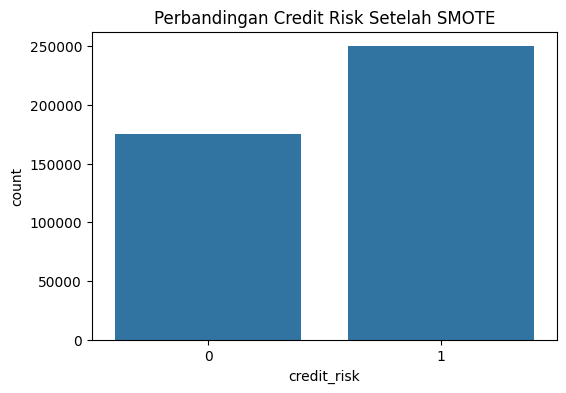

In [50]:
# Visualisasi perbandingan data training final
plt.figure(figsize=(6, 4))
sns.countplot(data=pd.DataFrame({'credit_risk': y_train_final}), x="credit_risk")
plt.title("Perbandingan Credit Risk Setelah SMOTE")

## Data Modelling

### Logistic Regression

In [51]:
# Set Up logistic regreesion
log_reg = LogisticRegression(max_iter=1000)

# Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_final, y_train_final)

# Simpan model terbaik
best_model_lr = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.75      0.50      2609
           1       0.96      0.84      0.90     20706

    accuracy                           0.83     23315
   macro avg       0.67      0.80      0.70     23315
weighted avg       0.90      0.83      0.86     23315

ROC-AUC Score: 0.86906549141114


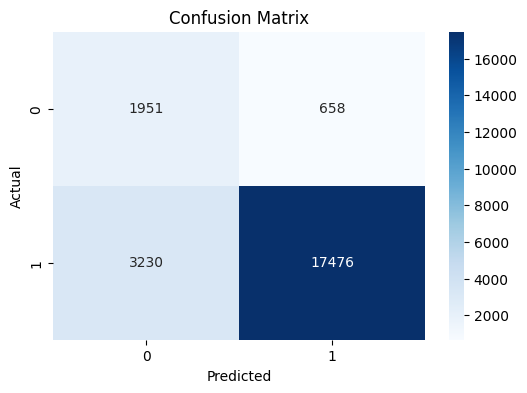

In [52]:
# Evaluasi Model
y_pred_lr = best_model_lr.predict(X_test)
y_proba_lr = best_model_lr.predict_proba(X_test)[:, 1]

print("Best Params:", grid_search.best_params_)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [53]:
# Cek Kemungkinan Overfitting
train_score = best_model_lr.score(X_train_final, y_train_final)
test_score = best_model_lr.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

if abs(train_score - test_score) > 0.1:
    print("⚠️ Model kemungkinan overfitting atau underfitting.")
else:
    print("✅ Model seimbang antara train dan test.")


Train Accuracy: 0.8122
Test Accuracy: 0.8332
✅ Model seimbang antara train dan test.


In [54]:
import joblib
# Simpan model ke file
joblib.dump(best_model_lr, 'logistic_model_credit_risk.pkl')

['logistic_model_credit_risk.pkl']

### K Nearest Neighbor (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Set up KNN classifier
knn = KNeighborsClassifier()

# Grid Search parameter grid untuk KNN
param_grid = {
    'n_neighbors': [3, 5],         # jumlah tetangga terdekat
    'weights': ['uniform', 'distance'], # pembobotan tetangga
    'metric': ['euclidean', 'manhattan'] # metrik jarak
}

grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_final, y_train_final)

# Simpan model terbaik
best_model_knn = grid_search.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2609
           1       1.00      1.00      1.00     20706

    accuracy                           1.00     23315
   macro avg       0.99      1.00      0.99     23315
weighted avg       1.00      1.00      1.00     23315

ROC-AUC Score: 0.9981070288571937


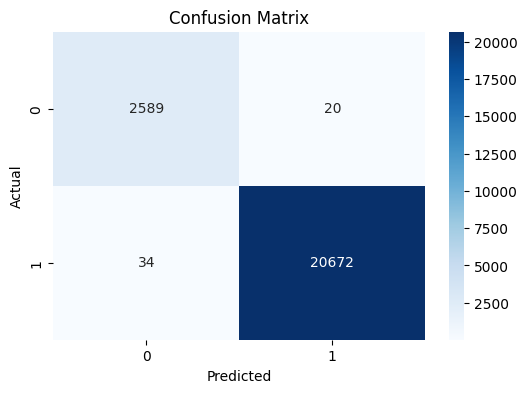

In [56]:
# Evaluasi Model KNN
y_pred_knn = best_model_knn.predict(X_test)
y_proba_knn = best_model_knn.predict_proba(X_test)[:, 1]

print("Best Params:", grid_search.best_params_)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_knn))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
# Cek Kemungkinan Overfitting pada random forest
train_score_knn = best_model_knn.score(X_train_final, y_train_final)
test_score_knn = best_model_knn.score(X_test, y_test)

print(f"Train Accuracy: {train_score_knn:.4f}")
print(f"Test Accuracy: {test_score_knn:.4f}")

if abs(train_score_knn - test_score_knn) > 0.1:
    print("⚠️ Model kemungkinan overfitting atau underfitting.")
else:
    print("✅ Model seimbang antara train dan test.")


Train Accuracy: 1.0000
Test Accuracy: 0.9977
✅ Model seimbang antara train dan test.


In [58]:
# Simpan model ke file
joblib.dump(best_model_knn, 'knn_model_credit_risk.pkl')

['knn_model_credit_risk.pkl']

### Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Set up Naive Bayes classifier
nb = GaussianNB()

# Tidak banyak hyperparameter untuk GaussianNB,
# tapi kamu bisa pakai GridSearchCV kalau mau uji `var_smoothing`
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search = GridSearchCV(
    nb,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_final, y_train_final)

# Simpan model terbaik
best_model_nb = grid_search.best_estimator_


Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Params: {'var_smoothing': 1e-07}

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.85      0.37      2609
           1       0.97      0.65      0.78     20706

    accuracy                           0.67     23315
   macro avg       0.60      0.75      0.57     23315
weighted avg       0.89      0.67      0.73     23315

ROC-AUC Score: 0.865214732884338


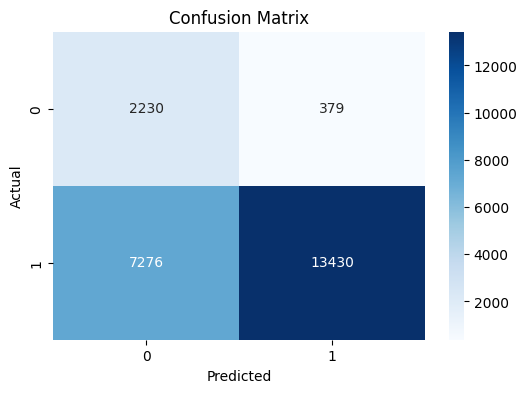

In [60]:
# Evaluasi Model Naive Bayes
y_pred_nb = best_model_nb.predict(X_test)
y_proba_nb = best_model_nb.predict_proba(X_test)[:, 1]

print("Best Params:", grid_search.best_params_)
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_nb))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [61]:
# Cek Kemungkinan Overfitting pada random forest
train_score_nb = best_model_nb.score(X_train_final, y_train_final)
test_score_nb = best_model_nb.score(X_test, y_test)

print(f"Train Accuracy: {train_score_nb:.4f}")
print(f"Test Accuracy: {test_score_nb:.4f}")

if abs(train_score_nb - test_score_nb) > 0.1:
    print("⚠️ Model kemungkinan overfitting atau underfitting.")
else:
    print("✅ Model seimbang antara train dan test.")


Train Accuracy: 0.7411
Test Accuracy: 0.6717
✅ Model seimbang antara train dan test.


In [62]:
# Simpan model ke file
joblib.dump(best_model_nb, 'naive_bayes_model_credit_risk.pkl')

['naive_bayes_model_credit_risk.pkl']

## Evaluasi

### Hasil Testing Tiap Model

In [ ]:
# Logistic Regression
# Hitung metrik evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

# Tampilkan hasil
print("Logistic Regression Metrics Test:")
print(f"Accuracy : {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall   : {recall_lr:.4f}")
print(f"F1 Score : {f1_lr:.4f}")
print(f"ROC AUC  : {roc_auc_lr:.4f}")

Logistic Regression Metrics Test:
Accuracy : 0.8332
Precision: 0.9637
Recall   : 0.8440
F1 Score : 0.8999
ROC AUC  : 0.8691


In [ ]:
# KNN
# Hitung metrik evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label=1)
recall_knn = recall_score(y_test, y_pred_knn, pos_label=1)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

# Tampilkan hasil
print("Logistic Regression Metrics Test:")
print(f"Accuracy : {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall   : {recall_knn:.4f}")
print(f"F1 Score : {f1_knn:.4f}")
print(f"ROC AUC  : {roc_auc_knn:.4f}")

Logistic Regression Metrics Test:
Accuracy : 0.9977
Precision: 0.9990
Recall   : 0.9984
F1 Score : 0.9987
ROC AUC  : 0.9981


In [ ]:
# Naive Bayes
# Hitung metrik evaluasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label=1)
recall_nb = recall_score(y_test, y_pred_nb, pos_label=1)
f1_nb = f1_score(y_test, y_pred_nb, pos_label=1)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

# Tampilkan hasil
print("Logistic Regression Metrics Test:")
print(f"Accuracy : {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall   : {recall_nb:.4f}")
print(f"F1 Score : {f1_nb:.4f}")
print(f"ROC AUC  : {roc_auc_nb:.4f}")

Logistic Regression Metrics Test:
Accuracy : 0.6717
Precision: 0.9726
Recall   : 0.6486
F1 Score : 0.7782
ROC AUC  : 0.8652


### Perbandingan Metriks Evaluasi

Pada kasus ini, kita akan menggunakan ROC AUC score untuk melihat dan memilih model terbaik. ROC AUC dipilih karena metrik ini memberikan gambaran menyeluruh tentang kemampuan model dalam membedakan antara kelas Bad dan Good, tanpa bergantung pada threshold tertentu. Selain itu, ROC AUC sangat cocok digunakan pada data yang tidak seimbang, seperti pada kasus credit risk prediction, karena tetap memberikan evaluasi yang adil terhadap performa model.

Meskipun dalam credit risk prediction umumnya recall penting untuk meminimalkan risiko pemberian kredit kepada peminjam yang berisiko tinggi, ROC AUC memberikan evaluasi yang lebih stabil dan komprehensif atas seluruh rentang threshold. Hal ini memungkinkan pihak pemberi pinjaman untuk menyesuaikan threshold pengambilan keputusan sesuai kebijakan risiko internal berdasarkan probabilitas risiko yang dihasilkan model.

In [ ]:
# Buat dictionary dari nama model dan skor ROC AUC-nya
roc_auc_scores = {
    "Logistic Regression": roc_auc_lr,
    "KNN": roc_auc_knn,
    "Naive Bayes": roc_auc_nb,
}

# Buat DataFrame untuk tampilkan tabel
df_roc_auc = pd.DataFrame(list(roc_auc_scores.items()), columns=["Model", "ROC AUC Score"])
df_roc_auc = df_roc_auc.sort_values(by="ROC AUC Score", ascending=False).reset_index(drop=True)
df_roc_auc

,Model,ROC AUC Score
0,KNN,0.998107
1,Logistic Regression,0.869066
2,Naive Bayes,0.865215


### Analisa Hasil Evaluasi

1. **KNN**
- ✅ ROC AUC Score sangat tinggi (0.998) menunjukkan performa klasifikasi yang sangat baik.
- ⚠️ **Kurang cocok untuk dataset besar**, karena KNN harus menghitung jarak ke seluruh data saat prediksi → proses prediksi lambat dan memakan banyak memori. Pada
- ⚠️ Sensitif terhadap skala fitur dan outlier.
- **Rekomendasi**: Tidak disarankan untuk digunakan dalam skenario produksi berskala besar, kecuali jika dilakukan optimasi khusus (misalnya KD-Tree atau Approximate Nearest Neighbors).

2. **Logistic Regression**
- ✅ Skor ROC AUC cukup baik (0.869).
- ✅ **Cocok untuk dataset besar** karena model ini ringan, cepat saat pelatihan dan prediksi, serta skalabel.
- ✅ Mudah diinterpretasikan dan dijelaskan ke stakeholder.
- ✅ Stabil dan sering digunakan dalam dunia nyata untuk credit scoring.
- **Rekomendasi**: **Sangat layak digunakan untuk dataset besar**, terutama jika dibutuhkan efisiensi dan interpretabilitas.

3. **Naive Bayes**
- ✅ Skor ROC AUC kompetitif (0.865), sangat cepat dilatih dan dieksekusi.
- ✅ Cocok untuk data besar, namun asumsi independensi antar fitur bisa membatasi akurasi.
- ⚠️ Kurang akurat jika korelasi antar fitur tinggi.
- **Rekomendasi**: Bisa digunakan sebagai baseline atau model alternatif jika kebutuhan utamanya adalah kecepatan inferensi.


### Kesimpulan

🔵 **Logistic Regression** adalah pilihan terbaik. Walaupun skor untuk ROC AUC lebih rendah dibandingkan dengan KNN, Pada dataset yang besar dalam kasus credit risk prediction ini, model ini dipilih karena:
- Memberikan performa ROC AUC yang baik,
- Sangat cepat dalam melakukan prediksi dibandingakan KNN yang sangat lambat
- Mudah dipahami dan diimplementasikan,
- Model yang dihasilkan memiliki ukuran yang kecil serta ringan
- Lebih tahan terhadap noise dan data imbalance dibanding KNN,
- Banyak digunakan secara luas dalam industri keuangan.
